# <p style="background-color:  #00008B; font-family:newtimeroman;font-size:180%;color:#FFF9ED;text-align:center;border-radius:80px 20px;"><b>Adult Income Project<img style="width: 70x;"  style="position: absolute; right: 5px; top: 60%; transform: translateY(-70%);"> </div> 

<p style="text-align: center;"><img src=".png" style="width: 100%; height: 500px; object-fit: cover;">
</p>

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Import Libraries

In [1]:
!pip install cufflinks

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (9,9)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis and Visualization

In [3]:
df = pd.read_csv('adult.csv')
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [4]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
df.sample(5).T

1966                24218          1629   \
age                             42                  26             33   
workclass                  Private           State-gov        Private   
fnlwgt                      119359              141838         134886   
education              Prof-school           Bachelors   Some-college   
education.num                   15                  13             10   
marital.status  Married-civ-spouse  Married-civ-spouse  Never-married   
occupation                   Sales     Exec-managerial   Adm-clerical   
relationship                  Wife             Husband      Own-child   
race            Amer-Indian-Eskimo               Black          White   
sex                         Female                Male         Female   
capital.gain                 15024                   0          99999   
capital.loss                     0                   0              0   
hours.per.week                  40                  40             30   
native.country               South       United-States  United-States   
income                        >50K                >50K           >50K   

                        22940               13510  
age                        23                  30  
workclass         Federal-gov             Private  
fnlwgt                  41031              291951  
education        Some-college             HS-grad  
education.num              10                   9  
marital.status  Never-married  Married-civ-spouse  
occupation              Sales        Craft-repair  
relationship    Not-in-family             Husband  
race                    White               Black  
sex                    Female                Male  
capital.gain                0                   0  
capital.loss                0                   0  
hours.per.week             35                  40  
native.country  United-States       United-States  
income                  <=50K               <=50K

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.shape

(32561, 15)

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.describe().T

count       mean        std       min        25%  \
age            32561.000     38.582     13.640    17.000     28.000   
fnlwgt         32561.000 189778.367 105549.978 12285.000 117827.000   
education.num  32561.000     10.081      2.573     1.000      9.000   
capital.gain   32561.000   1077.649   7385.292     0.000      0.000   
capital.loss   32561.000     87.304    402.960     0.000      0.000   
hours.per.week 32561.000     40.437     12.347     1.000     40.000   

                      50%        75%         max  
age                37.000     48.000      90.000  
fnlwgt         178356.000 237051.000 1484705.000  
education.num      10.000     12.000      16.000  
capital.gain        0.000      0.000   99999.000  
capital.loss        0.000      0.000    4356.000  
hours.per.week     40.000     45.000      99.000

In [10]:
def missing_values(df):
    
    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

count  percentage
age                 0       0.000
workclass           0       0.000
fnlwgt              0       0.000
education           0       0.000
education.num       0       0.000
marital.status      0       0.000
occupation          0       0.000
relationship        0       0.000
race                0       0.000
sex                 0       0.000
capital.gain        0       0.000
capital.loss        0       0.000
hours.per.week      0       0.000
native.country      0       0.000
income              0       0.000

In [11]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include=['int64','float64']).columns

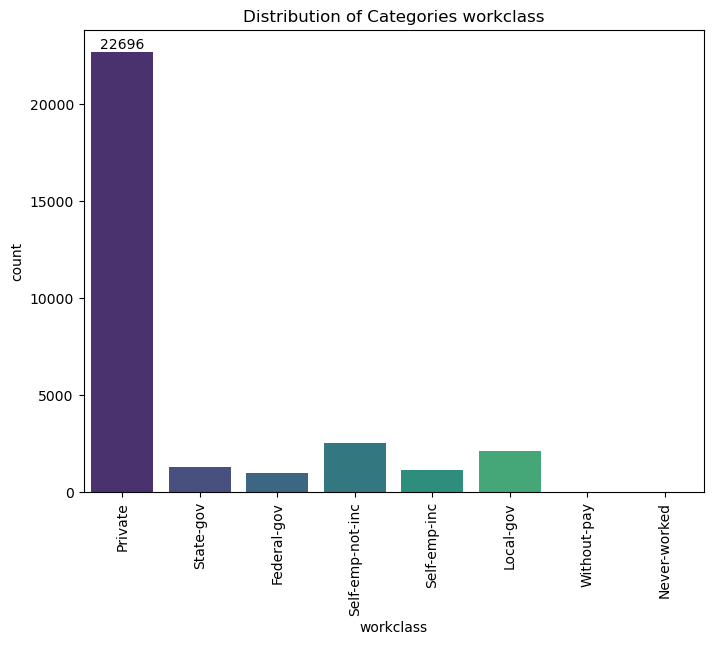

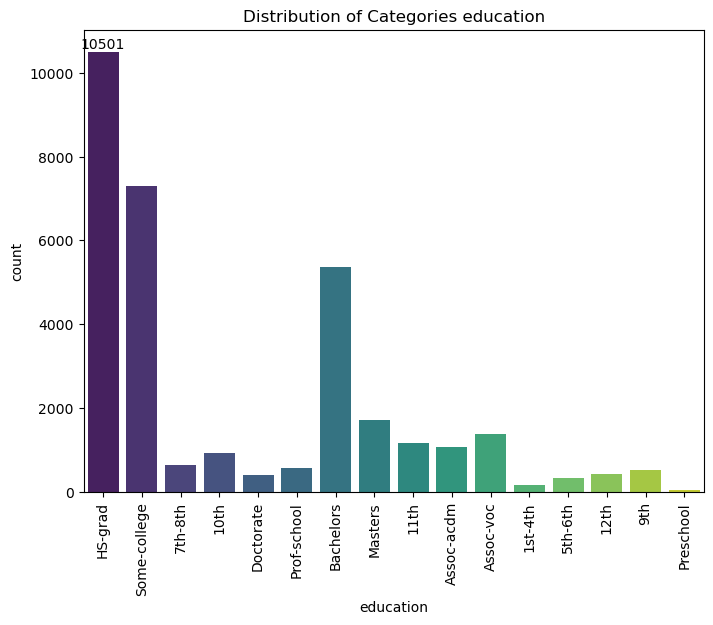

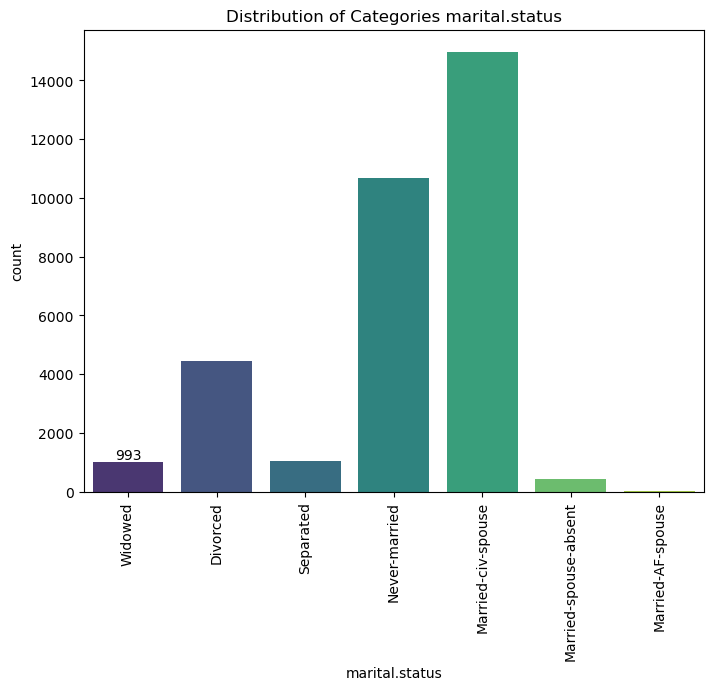

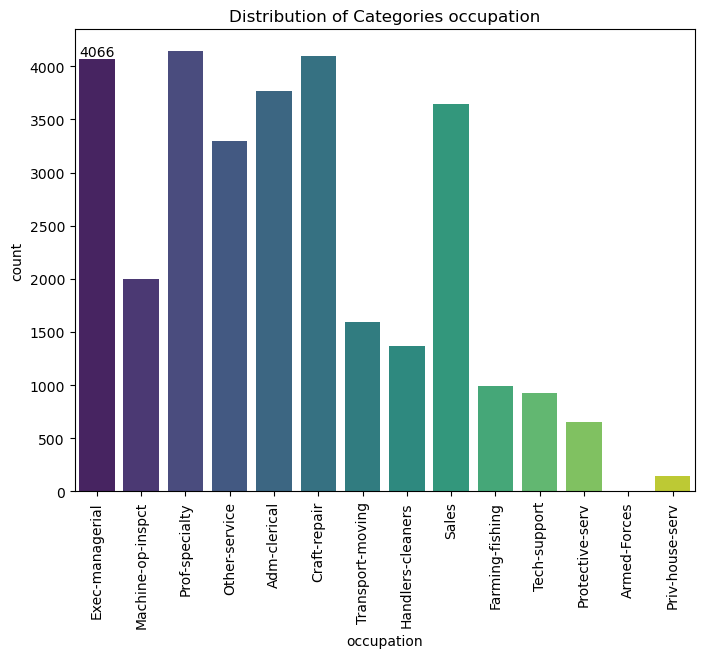

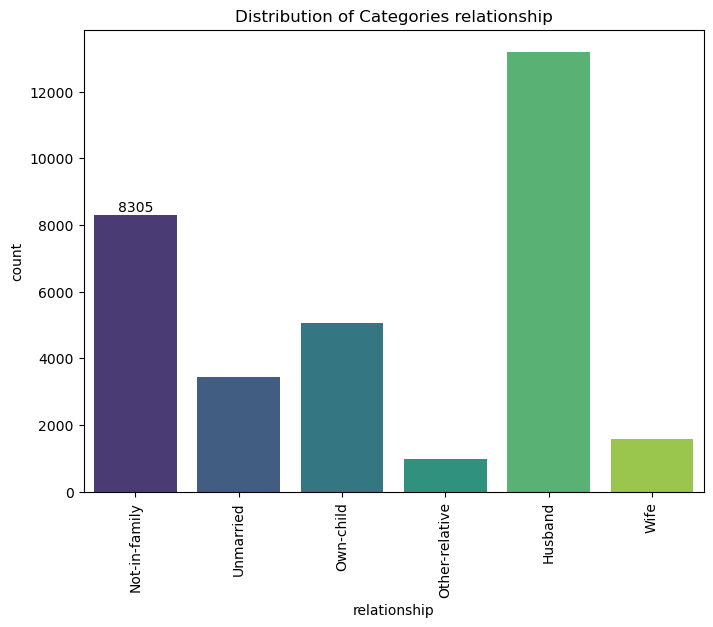

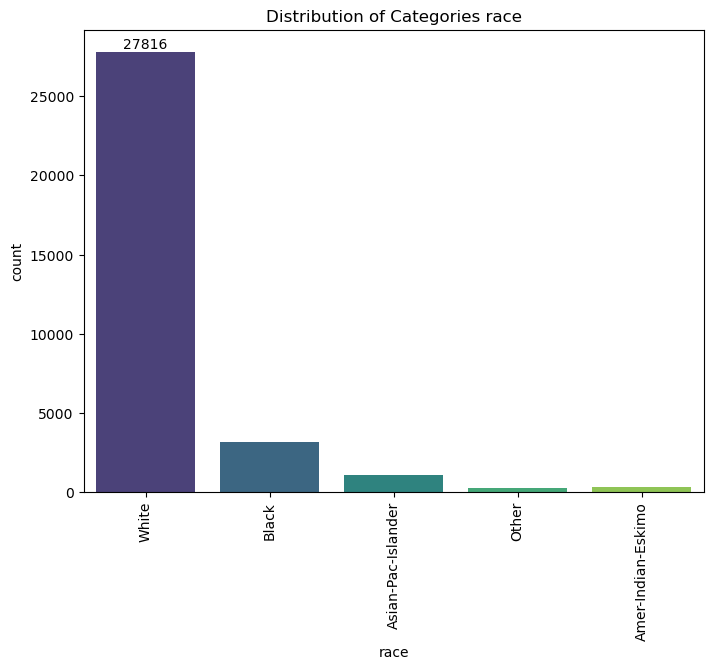

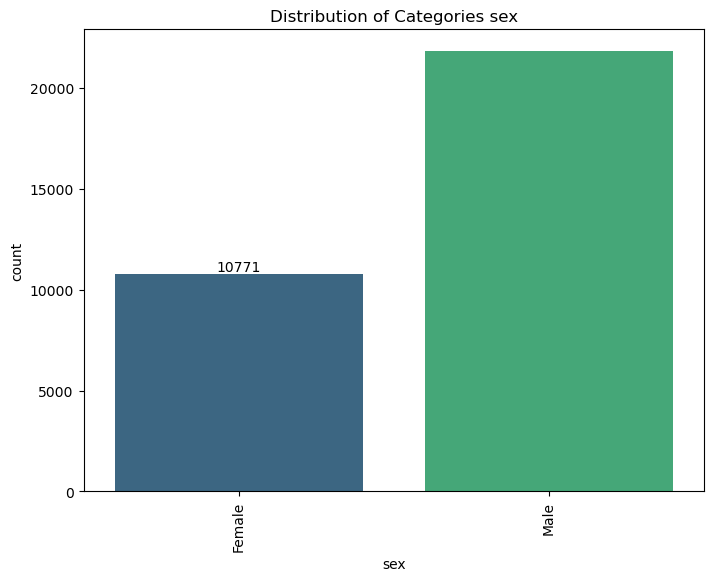

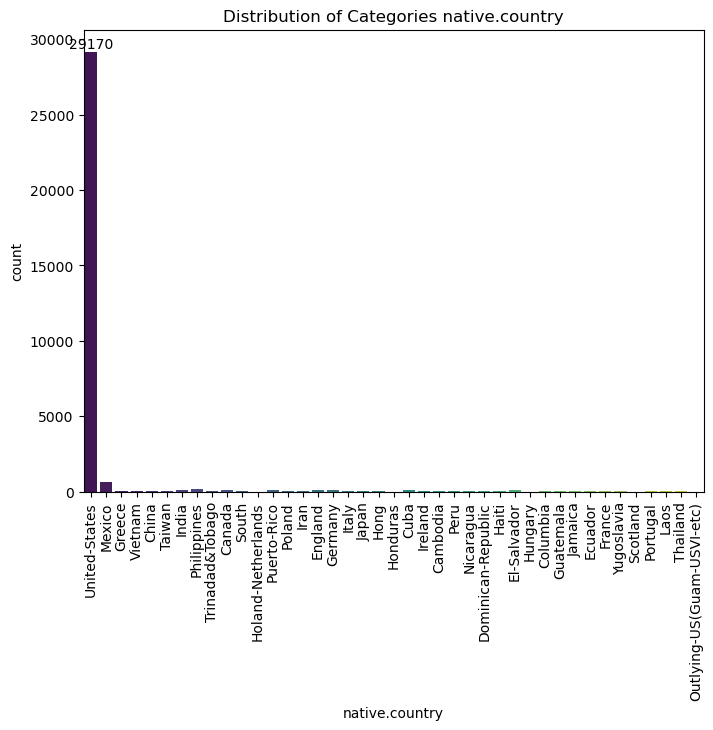

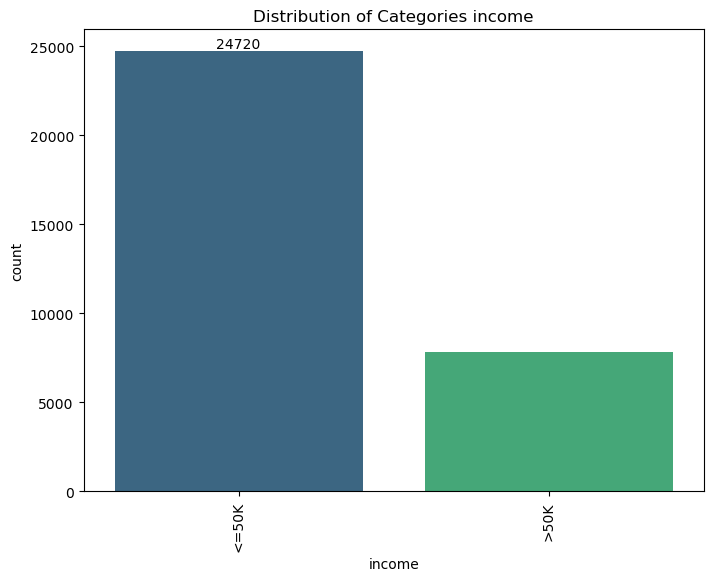

In [13]:
# Kategorik feature ların dağılımını göstermek için;

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [14]:
species_count = df['income'].value_counts().reset_index()
species_count.columns = ['income', 'count']

fig = px.bar(species_count, x='income', y='count', text='count', color='income')

fig.update_traces(texttemplate='%{text}', textposition='outside')

In [15]:
species_sex_count = df.groupby(['income', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='income', y='count', color='income', facet_col='sex', text='count')

fig.update_traces(texttemplate='%{text}', textposition='outside')

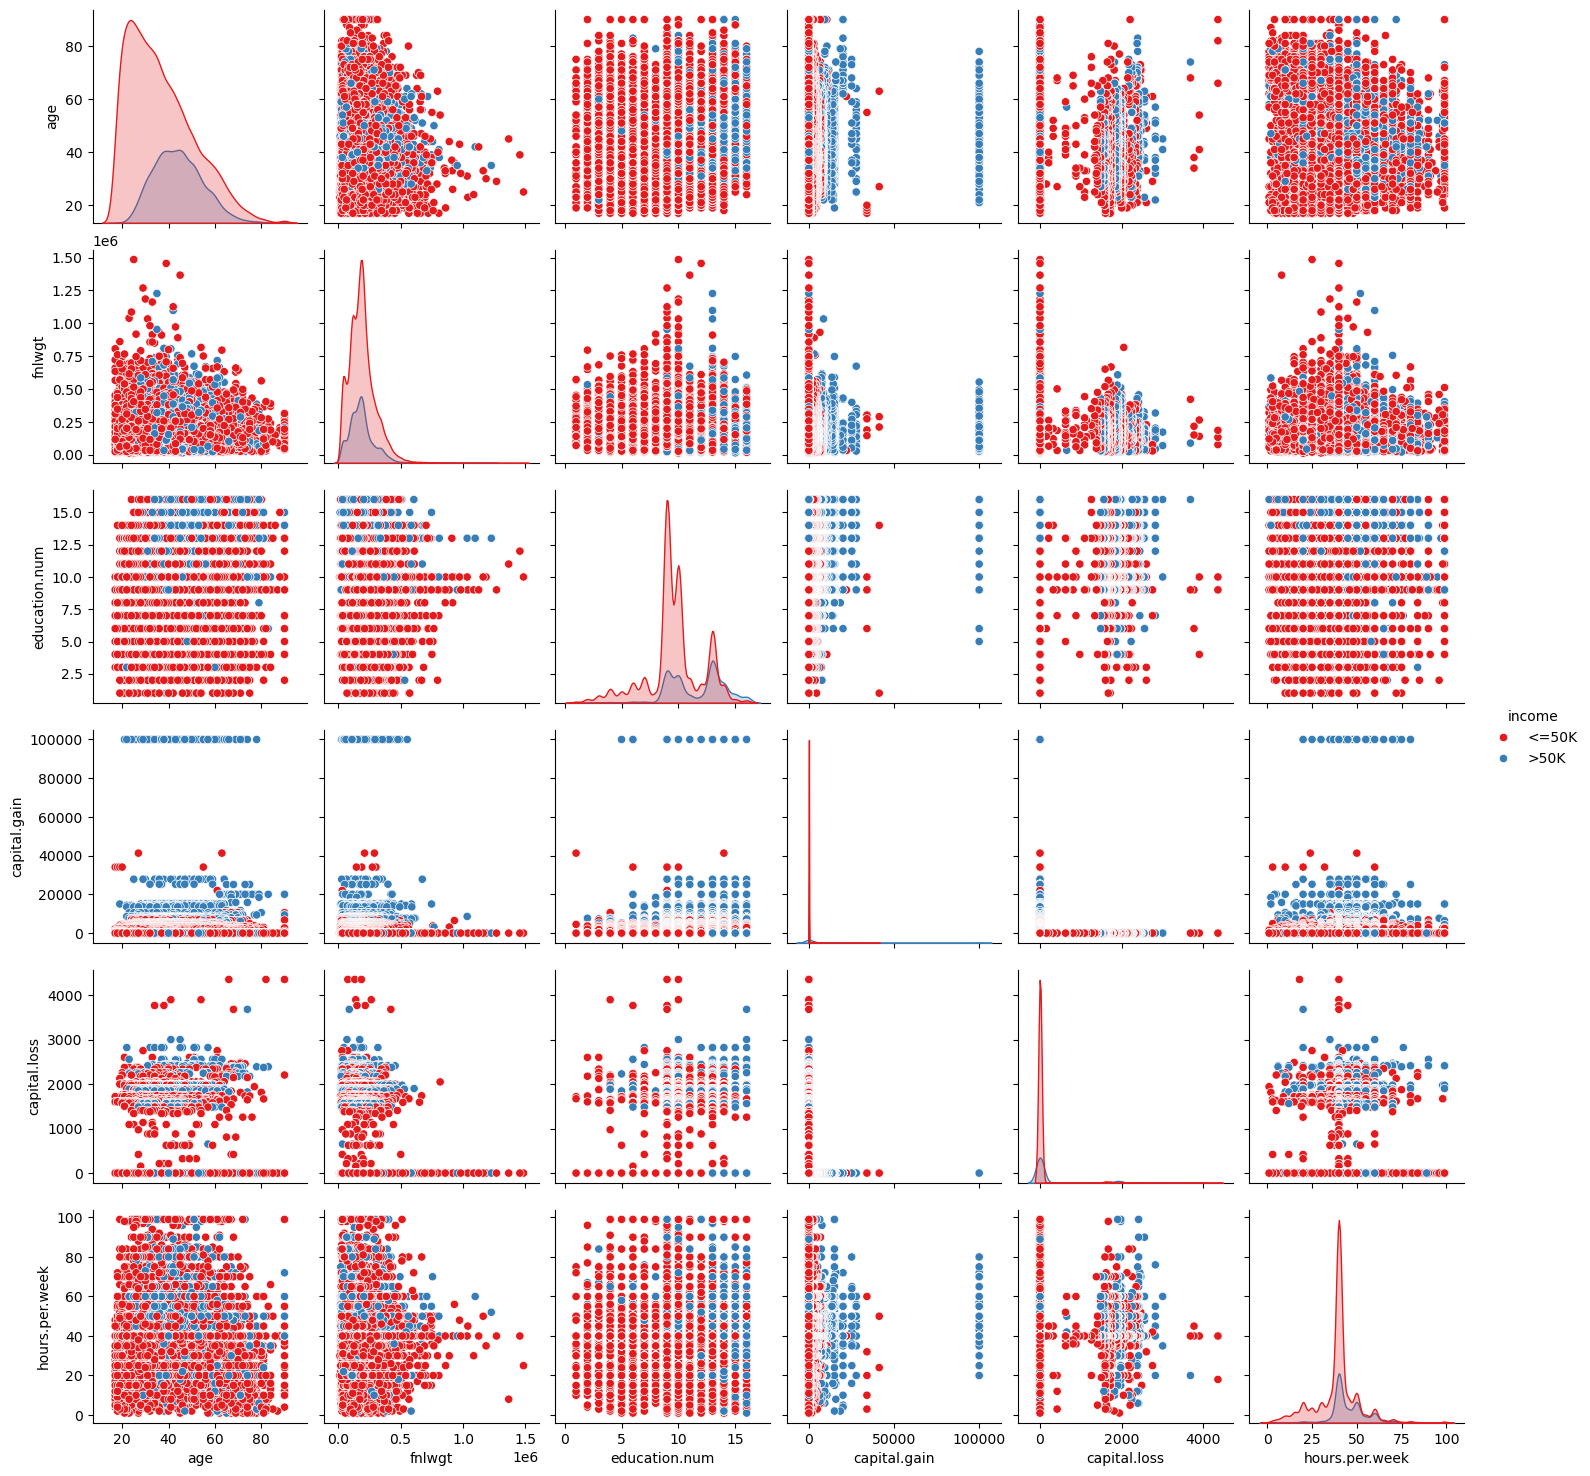

In [16]:
sns.pairplot(df, hue="income", palette="Set1");

In [17]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

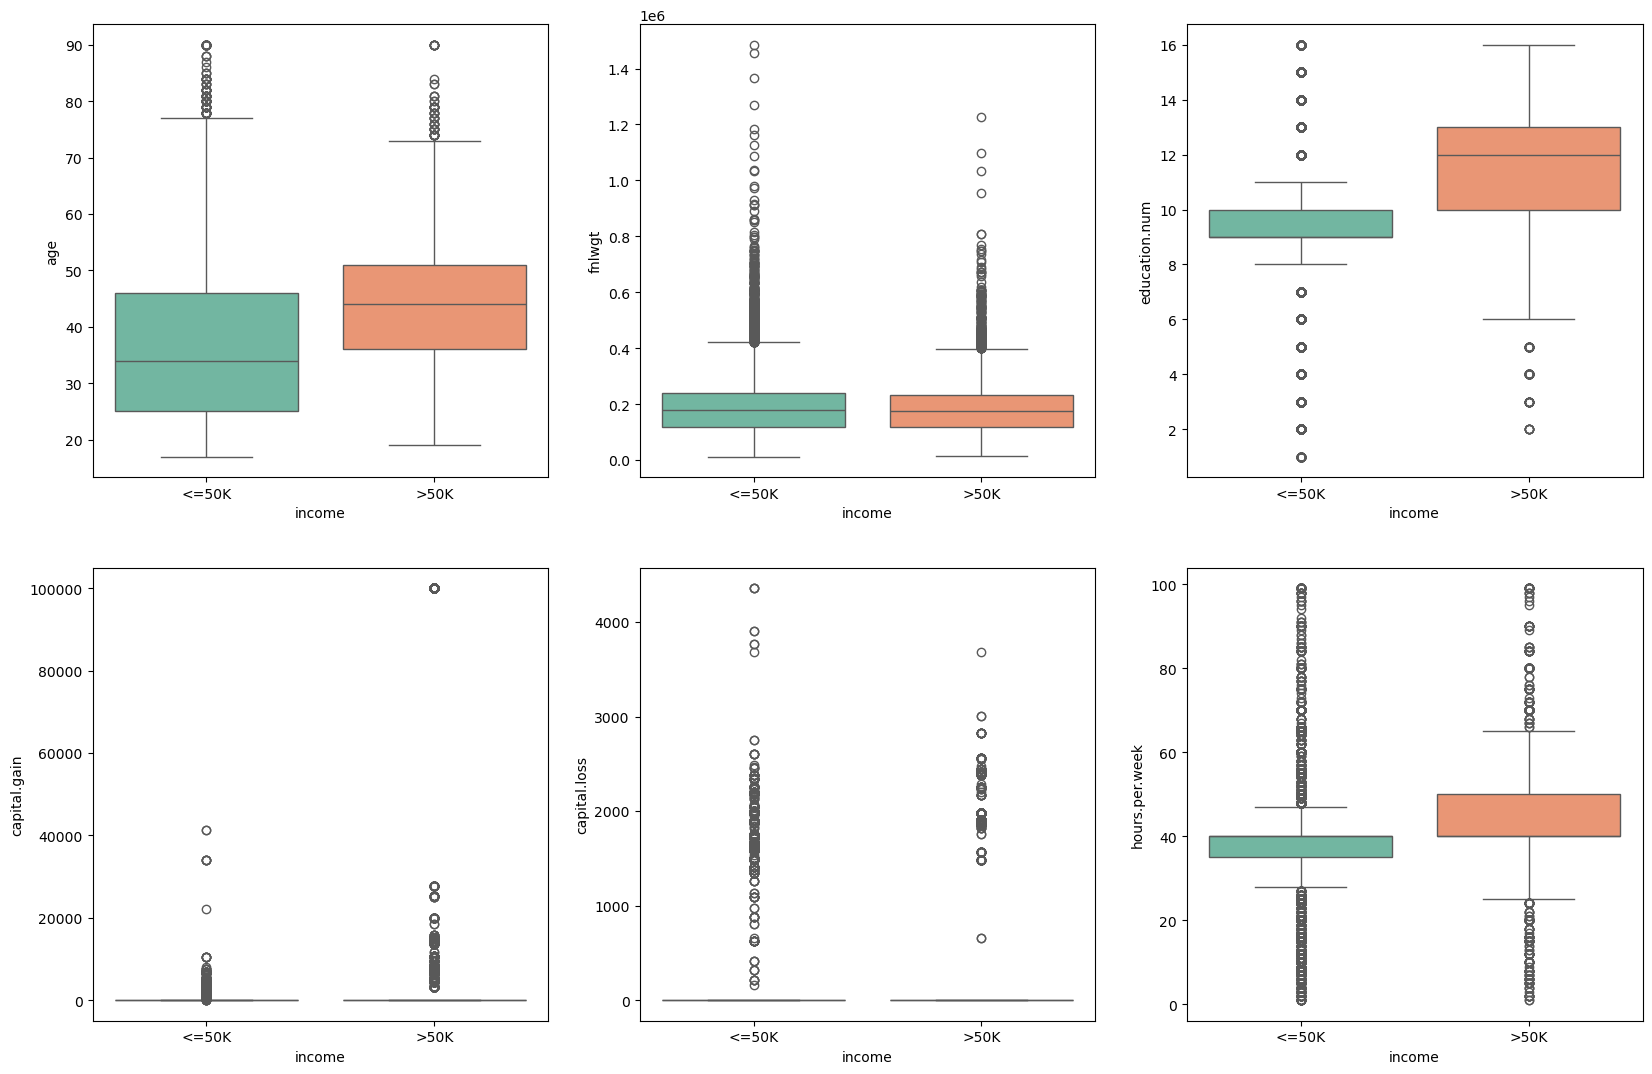

In [18]:
index = 0
plt.figure(figsize=(20,20))
for feature in num_features:
    if feature != "income":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='income',y=feature,data=df, palette='Set2')
plt.show()

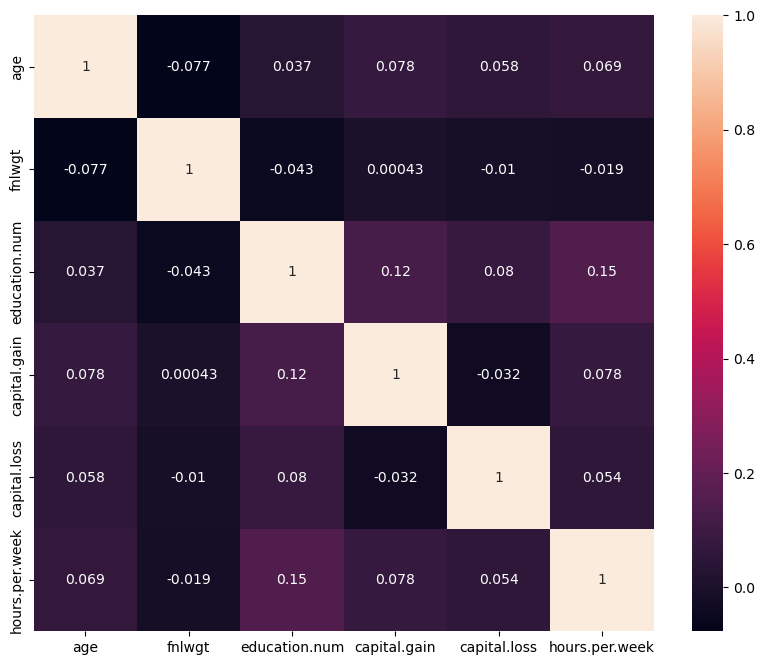

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot = True);

In [20]:
df["income"] = df['income'].map({'>50K': 1, '<=50K': 0})

In [21]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [22]:
from sklearn.impute import SimpleImputer


In [23]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print(df)

         age workclass     fnlwgt     education  education.num  \
0     90.000   Private  77053.000       HS-grad          9.000   
1     82.000   Private 132870.000       HS-grad          9.000   
2     66.000   Private 186061.000  Some-college         10.000   
3     54.000   Private 140359.000       7th-8th          4.000   
4     41.000   Private 264663.000  Some-college         10.000   
...      ...       ...        ...           ...            ...   
32556 22.000   Private 310152.000  Some-college         10.000   
32557 27.000   Private 257302.000    Assoc-acdm         12.000   
32558 40.000   Private 154374.000       HS-grad          9.000   
32559 58.000   Private 151910.000       HS-grad          9.000   
32560 22.000   Private 201490.000       HS-grad          9.000   

           marital.status         occupation   relationship   race     sex  \
0                 Widowed     Prof-specialty  Not-in-family  White  Female   
1                 Widowed    Exec-managerial  Not-i

# Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [25]:
X = df.drop('income', axis=1)
y = df['income']

### Train | Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [27]:
X_train.shape

(29304, 14)

In [28]:
X_test.shape

(3257, 14)

In [29]:
cat = X_train.select_dtypes("object").columns
cat

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [30]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())


In [31]:
pd.DataFrame(column_trans.fit_transform(X_train))

0     1     2     3     4     5     6     7     8     9   ...    86  \
0     0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   
1     0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   
2     0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   
3     0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   
4     0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
29299 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   
29300 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   
29301 0.000 0.000 0.000 0.000 1.000 0.000 0.000 1.000 0.000 0.000  ... 0.000   
29302 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   
29303 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   

         87    88    89     90     91     92     93     94     95  
0     1.000 0.000 0.000 -0.777  1.403  1.133 -0.146 -0.217 -0.037  
1     1.000 0.000 0.000 -1.364  0.294 -0.420 -0.146 -0.217 -0.037  
2     0.000 0.000 0.000 -0.336 -0.117  0.356 -0.146 -0.217 -0.037  
3     0.000 0.000 0.000 -0.777  0.068 -0.420 -0.146 -0.217  0.773  
4     1.000 0.000 0.000 -0.043  0.093 -0.420 -0.146 -0.217 -0.037  
...     ...   ...   ...    ...    ...    ...    ...    ...    ...  
29299 1.000 0.000 0.000 -0.190 -0.372  1.909 -0.146 -0.217  0.773  
29300 1.000 0.000 0.000 -0.997  0.630  1.133 -0.146 -0.217 -0.037  
29301 1.000 0.000 0.000 -1.511 -0.310 -1.197 -0.146 -0.217 -0.037  
29302 1.000 0.000 0.000 -0.263  1.364 -0.032 -0.146 -0.217  0.773  
29303 1.000 0.000 0.000 -0.336  1.472 -0.420 -0.146 -0.217  0.368  

[29304 rows x 96 columns]

In [32]:
operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=42))]

pipe_log = Pipeline(steps=operations)

In [33]:
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('log_model', LogisticRegression(random_state=42))])

In [34]:
y_pred = pipe_log.predict(X_test)
y_pred_proba = pipe_log.predict_proba(X_test)

In [35]:
my_dict = {"actual": y_test}

In [36]:
result_log = pd.DataFrame(my_dict)
result_log

actual
26410   0.000
8110    1.000
30930   0.000
23211   0.000
18594   0.000
...       ...
7518    0.000
6145    1.000
17114   0.000
18396   0.000
131     1.000

[3257 rows x 1 columns]

In [37]:
result_log["pred"] = y_pred
result_log

actual  pred
26410   0.000 0.000
8110    1.000 1.000
30930   0.000 0.000
23211   0.000 0.000
18594   0.000 0.000
...       ...   ...
7518    0.000 0.000
6145    1.000 0.000
17114   0.000 0.000
18396   0.000 1.000
131     1.000 1.000

[3257 rows x 2 columns]

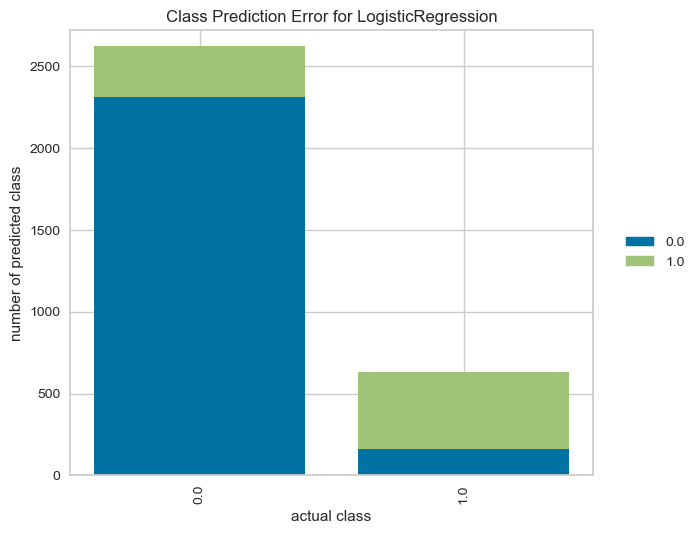

In [38]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_log)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

In [39]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [40]:
eval_metric(pipe_log, X_train, y_train, X_test, y_test)

Test_Set
[[2311  162]
 [ 317  467]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      2473
         1.0       0.74      0.60      0.66       784

    accuracy                           0.85      3257
   macro avg       0.81      0.77      0.78      3257
weighted avg       0.85      0.85      0.85      3257


Train_Set
[[20739  1508]
 [ 2832  4225]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91     22247
         1.0       0.74      0.60      0.66      7057

    accuracy                           0.85     29304
   macro avg       0.81      0.77      0.78     29304
weighted avg       0.85      0.85      0.85     29304



## Cross Validate

In [41]:
operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", 
                                                            "recall", "f1"], 
                                      cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      1.291       0.047          0.850           0.851           0.734   
2      1.471       0.051          0.863           0.851           0.763   
3      1.263       0.062          0.846           0.852           0.724   
4      1.249       0.043          0.851           0.852           0.733   
5      1.147       0.045          0.851           0.852           0.741   
6      1.185       0.043          0.846           0.853           0.722   
7      1.292       0.061          0.854           0.852           0.735   
8      1.378       0.057          0.853           0.851           0.744   
9      1.342       0.044          0.846           0.853           0.712   
10     1.235       0.050          0.845           0.853           0.718   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.736        0.593         0.595    0.656     0.658  
2             0.736        0.622         0.593    0.685     0.657  
3             0.735        0.581         0.601    0.645     0.661  
4             0.736        0.599         0.599    0.659     0.661  
5             0.736        0.584         0.600    0.653     0.661  
6             0.739        0.584         0.600    0.646     0.662  
7             0.736        0.614         0.599    0.669     0.660  
8             0.736        0.593         0.597    0.660     0.659  
9             0.738        0.609         0.602    0.656     0.663  
10            0.740        0.585         0.601    0.645     0.663

In [42]:
df_scores.mean()[2:]

test_accuracy     0.850
train_accuracy    0.852
test_precision    0.733
train_precision   0.737
test_recall       0.597
train_recall      0.599
test_f1           0.658
train_f1          0.661
dtype: float64

## GridSearchCV

In [43]:
from sklearn.metrics import make_scorer, f1_score


In [44]:

operations = [("column_trans", column_trans), ("log_model", LogisticRegression(max_iter=5000, random_state=101))]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10) #katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]


param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C,1],  # hata alan alanlar "log_model__C" : C, yapsınlar
    "log_model__class_weight": class_weight,
    "log_model__solver": solver}

scorer = make_scorer(f1_score, average='macro')
grid_model = GridSearchCV(estimator = model, 
                          param_grid = param_grid, 
                          cv = 10, scoring = scorer, 
                          return_train_score=True,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

## ROC (Receiver Operating Charecteristic) Curve and AUC (Area Under Curve)

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

In [ ]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

In [ ]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

# K-Nearest Neighbors (KNN) Classification

In [ ]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)

In [ ]:
pipe_knn.fit(X_train, y_train)

In [ ]:
y_pred = pipe_knn.predict(X_test)
y_pred_proba = pipe_knn.predict_proba(X_test)

In [69]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('knn_model', KNeighborsClassifier())])

In [67]:
!pip install --upgrade scikit-learn numpy scipy threadpoolctl



     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 534.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.6 MB 4.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/10.6 MB 8.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/10.6 MB 9.5 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/10.6 MB 10.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.6 MB 11.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/10.6 MB 11.2 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/10.6 MB 11.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.6 MB 10.8 MB/s eta 0:00:01
   -

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
ydata-profiling 4.6.4 requires scipy<1.12,>=1.4.1, but you have scipy 1.12.0 which is incompatible.
ydata-profiling 4.6.4 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.


In [89]:
from sklearn.neighbors import KNeighborsClassifier  # For classification
from sklearn.neighbors import KNeighborsRegressor   # For regression


In [94]:
from sklearn.pipeline import pipe_knn
from sklearn.pipeline import Pipeline

ImportError: cannot import name 'pipe_knn' from 'sklearn.pipeline' (C:\Users\ktahi\anaconda3\Lib\site-packages\sklearn\pipeline.py)

In [88]:
y_pred = pipe_knn.predict(X_test)
y_pred_proba = pipe_knn.predict_proba(X_test)

NameError: name 'pipe_knn' is not defined

In [ ]:
my_dict = {"actual": y_test}
result_knn = pd.DataFrame(my_dict)
result_knn
result_knn["pred"] = y_pred
result_knn["pred_proba"] = y_pred_proba[:,1]
result_knn

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_knn)

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)

visualizer.poof();

In [ ]:
eval_metric(pipe_knn, X_train, y_train, X_test, y_test)

In [ ]:
operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:] 

In [ ]:
pipe_knn.get_params()

In [ ]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())
operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)
param_grid = {"knn_model__n_neighbors": range(1, 30), "knn_model__p":[1,2], "knn_model__weights":["uniform", "distance"]}

scorer = make_scorer(f1_score, average='macro')

knn_pipe_grid = GridSearchCV(pipe_knn, param_grid, cv=5, scoring=scorer)


In [ ]:
knn_pipe_grid.fit(X_train, y_train)  # assuming you have X_train and y_train


In [ ]:

eval_metric(knn_pipe_grid, X_train, y_train, X_test, y_test)

In [ ]:
knn_pipe_grid.best_score_

In [ ]:
knn_pipe_grid.best_params_

# Support Vector Classifier

In [55]:
from sklearn.svm import SVC

In [56]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("svm_model", SVC())]

pipe_svm = Pipeline(steps=operations)

In [57]:
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('svm_model', SVC())])

In [58]:
y_predict = pipe_svm.predict(X_test)
y_predict

array([0., 1., 0., ..., 0., 1., 1.])

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

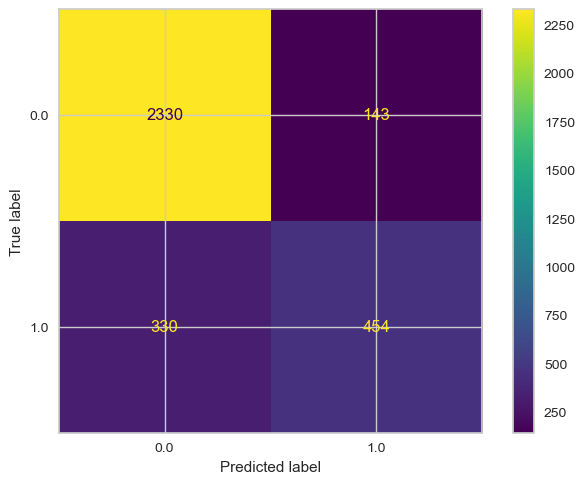

In [60]:
ConfusionMatrixDisplay.from_estimator(pipe_svm, X_test, y_test);

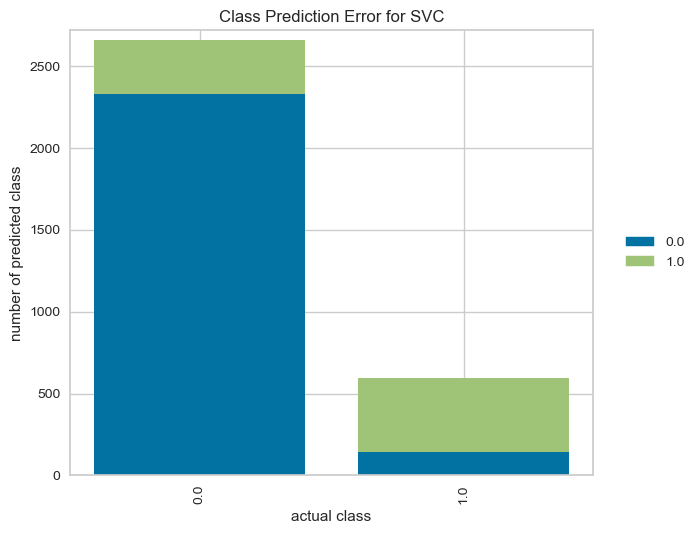

In [78]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_svm)

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)
visualizer.poof();


In [61]:
eval_metric(pipe_svm, X_train, y_train, X_test, y_test)

Test_Set
[[2330  143]
 [ 330  454]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2473
         1.0       0.76      0.58      0.66       784

    accuracy                           0.85      3257
   macro avg       0.82      0.76      0.78      3257
weighted avg       0.85      0.85      0.85      3257


Train_Set
[[21076  1171]
 [ 2760  4297]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     22247
         1.0       0.79      0.61      0.69      7057

    accuracy                           0.87     29304
   macro avg       0.84      0.78      0.80     29304
weighted avg       0.86      0.87      0.86     29304



In [62]:
operations = [("column_trans", column_trans), ("svm_model", SVC())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1    26.594       7.674          0.859           0.864           0.772   
2    18.941       5.539          0.853           0.866           0.753   
3    18.149       5.698          0.853           0.868           0.753   
4    20.401       5.678          0.861           0.866           0.769   
5    22.376       5.774          0.850           0.868           0.738   

   train_precision  test_recall  train_recall  test_f1  train_f1  
1            0.784        0.587         0.601    0.667     0.680  
2            0.787        0.582         0.608    0.656     0.686  
3            0.790        0.581         0.617    0.656     0.693  
4            0.786        0.605         0.607    0.677     0.685  
5            0.793        0.584         0.614    0.652     0.692

In [63]:
df_scores.mean()[2:]  

test_accuracy     0.855
train_accuracy    0.866
test_precision    0.757
train_precision   0.788
test_recall       0.588
train_recall      0.609
test_f1           0.662
train_f1          0.687
dtype: float64

In [64]:
pipe_svm.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['workclass', 'education', 'marital.status', 'occupation',
          'relationship', 'race', 'sex', 'native.country'],
         dtype='object'))])),
  ('svm_model', SVC())],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  Index(['workclass', 'education', 'marital.status', 'oc

In [65]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())
operations = [("column_trans", column_trans), ("svm_model",SVC())]
pipe_svm = Pipeline(steps=operations)
param_grid = {'svm_model__C': [0.1, 1.0, 10], 'svm_model__gamma': ["auto", "scale"], 'svm_model__kernel': ["rbf", "linear"] }

#'svm_model__C': [0.1, 1, 5] first given values

scorer = make_scorer(f1_score, average='macro')

# Grid search with cross-validation
svm_pipe_grid = GridSearchCV(pipe_svm, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Fit the grid search object to the data


In [66]:
svm_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                                       ('svm_model', SVC())]),
             n_jobs=-1,
             param_grid={'svm_model__C': [0.1, 1.0, 10],
                         'svm_model__gamma': ['auto', 'scale'],
                         'svm_model__kernel': ['rbf', 'linear']},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [67]:
y_pred = svm_pipe_grid.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 1., 1.])

In [68]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [69]:
eval_metric(svm_pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[2313  160]
 [ 300  484]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      2473
         1.0       0.75      0.62      0.68       784

    accuracy                           0.86      3257
   macro avg       0.82      0.78      0.79      3257
weighted avg       0.85      0.86      0.85      3257


Train_Set
[[21161  1086]
 [ 2197  4860]]
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93     22247
         1.0       0.82      0.69      0.75      7057

    accuracy                           0.89     29304
   macro avg       0.86      0.82      0.84     29304
weighted avg       0.88      0.89      0.88     29304



In [70]:
svm_pipe_grid.best_score_

0.7879379761858567

In [71]:
svm_pipe_grid.best_params_

{'svm_model__C': 10, 'svm_model__gamma': 'scale', 'svm_model__kernel': 'rbf'}